# Data Science Intern @Bharat Intern

Sarthak Sethi

# Task 1 : SMS Classifier

- Classification of SMS as either spam or non-spam

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.stem.porter import PorterStemmer

In [7]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

Loading the Dataset

In [9]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Data Cleaning

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [26]:
data.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)
data.rename(columns= {'v1': 'target', 'v2':'text' }, inplace = True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [28]:
data.drop_duplicates(keep='first', inplace = True)
data.duplicated().sum()

0

In [29]:
labelencoder = LabelEncoder()

data['target'] = labelencoder.fit_transform(data['target'])

Data Analysis

In [30]:
ham, spam = data['target'].value_counts()
print("ham: ", ham, "spam: ", spam )

ham:  4516 spam:  653


<function matplotlib.pyplot.show(close=None, block=None)>

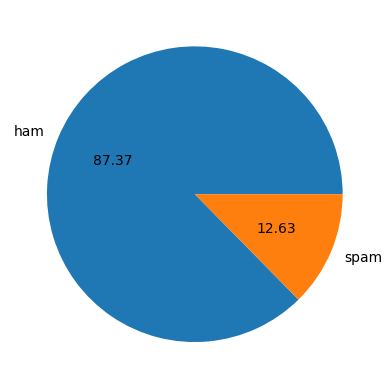

In [31]:
plt.pie(data['target'].value_counts(), labels = ['ham', 'spam'], autopct="%0.2f")
plt.show

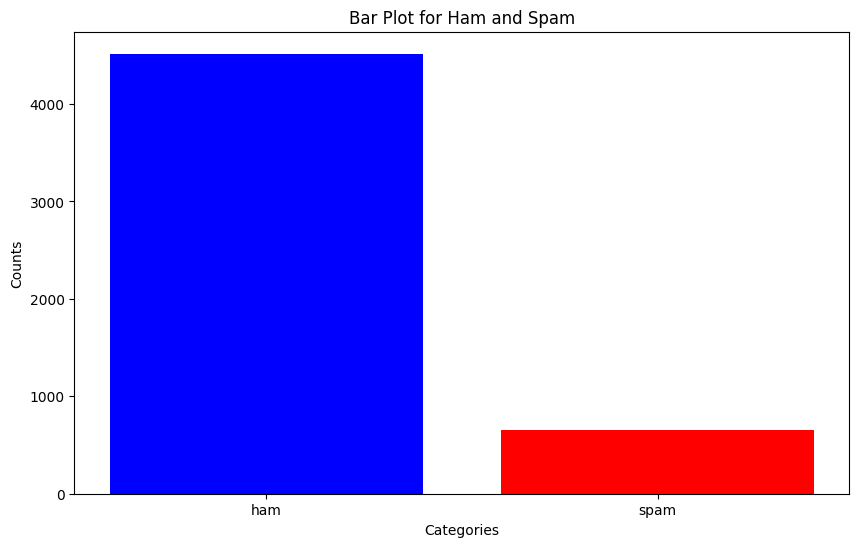

In [32]:
categories = ['ham', 'spam']
counts = [ham, spam]

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Plot for Ham and Spam')
plt.show()

In [33]:
data['num_characters'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
data[data['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
data[data['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

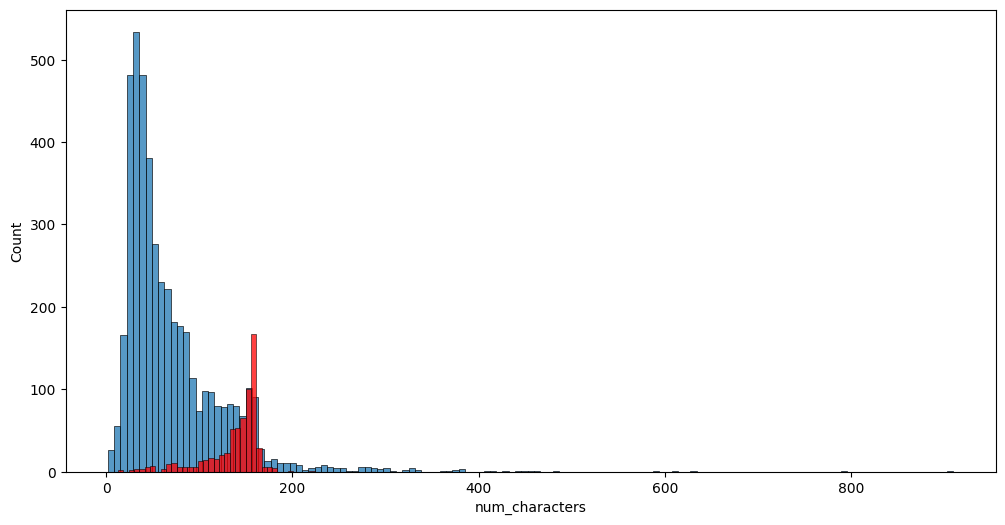

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters'])
sns.histplot(data[data['target'] == 1]['num_characters'], color = 'red')

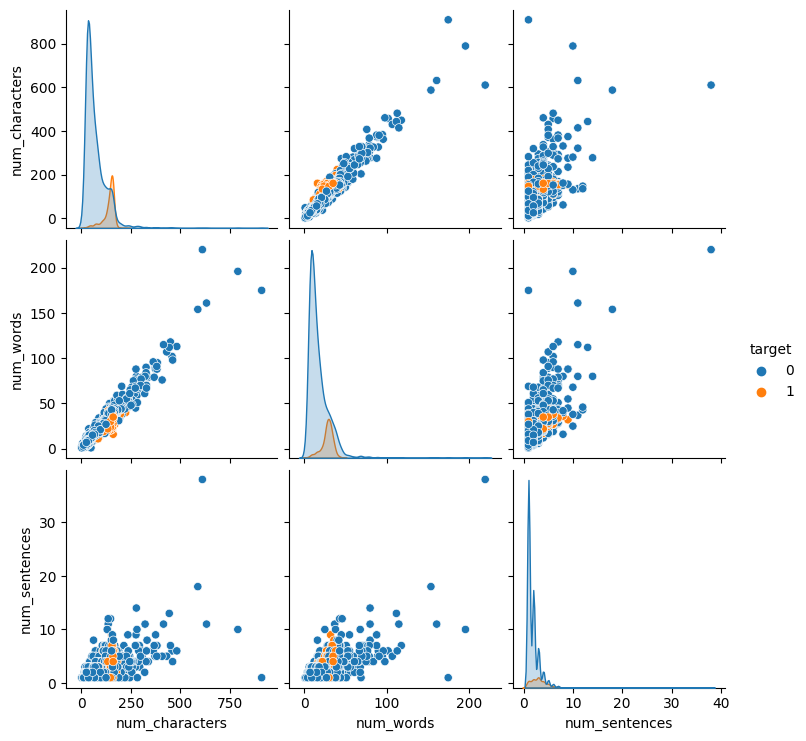

In [38]:
sns.pairplot(data, hue = 'target')

<Axes: >

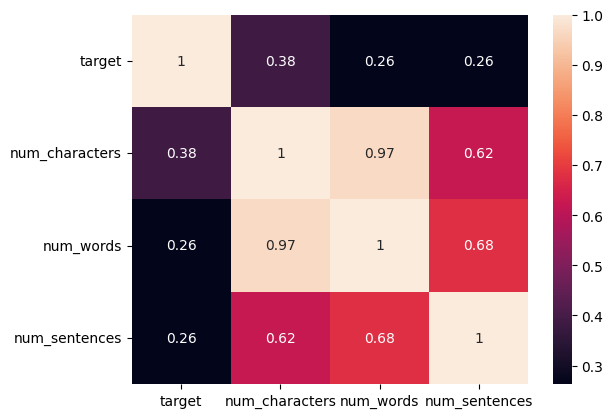

In [39]:
sns.heatmap(data.corr(), annot = True)

Data Preprocessing

In [40]:
ps = PorterStemmer()


def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


transform_text(data['text'][50])

'think first time saw class'

In [41]:
data['transformed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


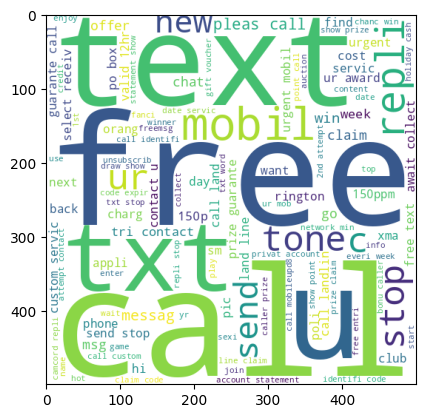

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height =500,min_font_size = 10, background_color = 'white')



spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))


plt.imshow(spam_wc)

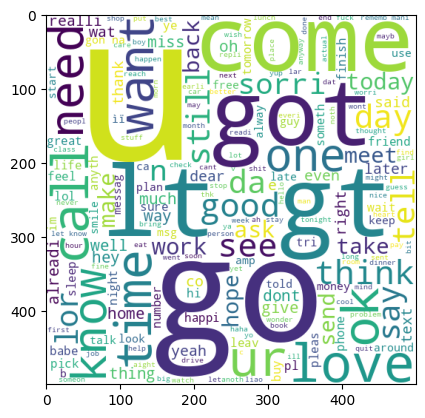

In [43]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))


plt.imshow(ham_wc)

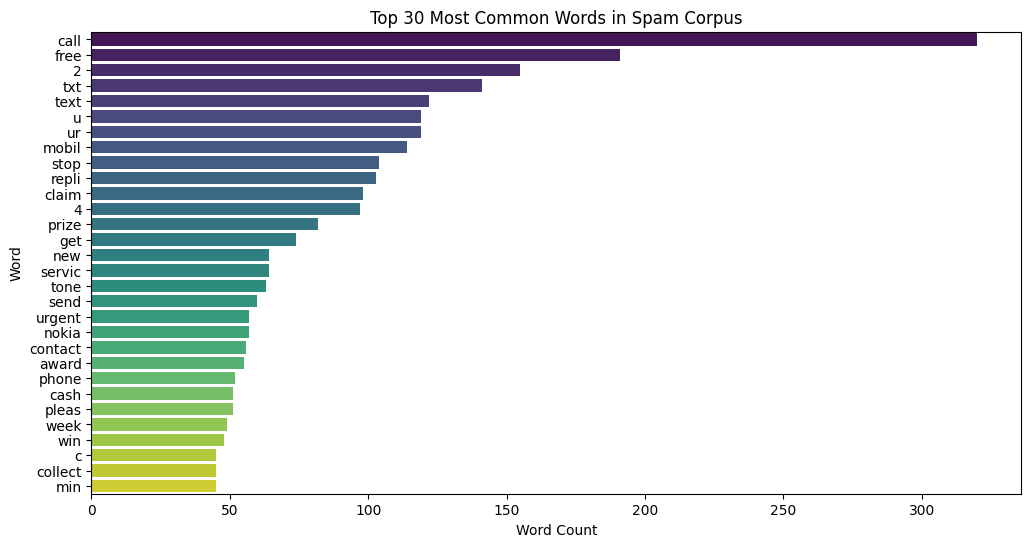

In [44]:
ham_corpus = []
for mgs in data[data['target'] == 1]['transformed_text'].tolist():
   for word in mgs.split():
    ham_corpus.append(word)



word_counter = Counter(ham_corpus)


df_word_counts = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_word_counts, palette='viridis')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()

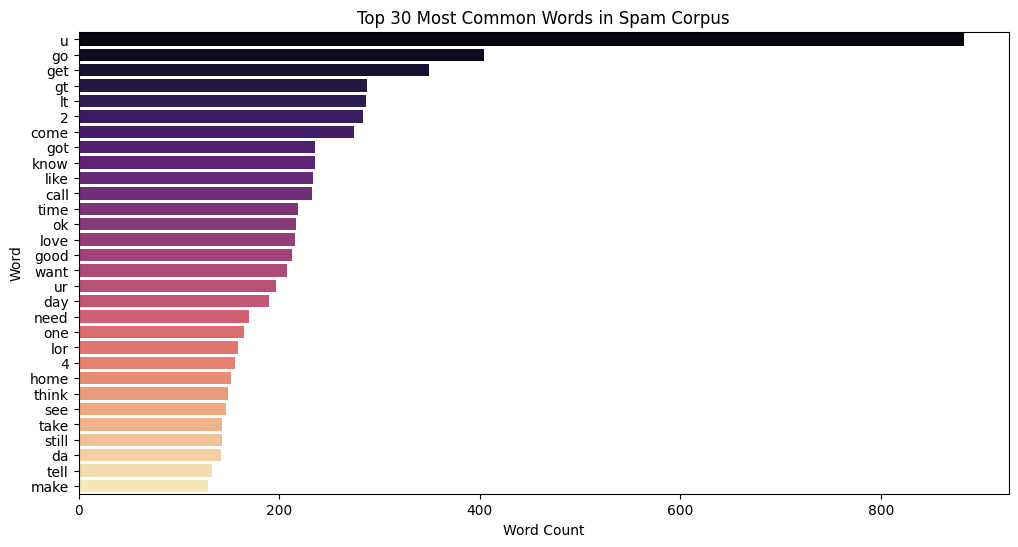

In [45]:
spam_corpus = []
for mgs in data[data['target'] == 0]['transformed_text'].tolist():
   for word in mgs.split():
    spam_corpus.append(word)


word_counter = Counter(spam_corpus)


df_word_counts = pd.DataFrame(word_counter.most_common(30), columns=['Word', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_word_counts, palette='magma')
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()

Model building

In [46]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)
X = tfidf.fit_transform(data['transformed_text']).toarray()
X.shape

(5169, 3000)

In [47]:
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)
gnb = GaussianNB()
model1 = gnb.fit(X_train, y_train)
pred1 = gnb.predict(X_test)
print("accuracy score: ",accuracy_score(y_test, pred1))
print("confusion matrics: ",confusion_matrix(y_test,pred1))
print("precision score: ", precision_score(y_test,pred1))

accuracy score:  0.8694390715667312
confusion matrics:  [[788 108]
 [ 27 111]]
precision score:  0.5068493150684932


In [48]:
mnb = MultinomialNB()
model2 = mnb.fit(X_train, y_train)
pred2 = mnb.predict(X_test)
print("accuracy score: ",accuracy_score(y_test, pred2))
print("confusion matrics: ",confusion_matrix(y_test,pred2))
print("precision score: ", precision_score(y_test,pred2))

accuracy score:  0.9709864603481625
confusion matrics:  [[896   0]
 [ 30 108]]
precision score:  1.0


In [49]:
bnb = BernoulliNB()
model3 = bnb.fit(X_train, y_train)
pred3 = bnb.predict(X_test)
print("accuracy score: ",accuracy_score(y_test, pred3))
print("confusion matrics: ",confusion_matrix(y_test,pred3))
print("precision score: ", precision_score(y_test,pred3))

accuracy score:  0.9835589941972921
confusion matrics:  [[895   1]
 [ 16 122]]
precision score:  0.991869918699187


Comparison of Models

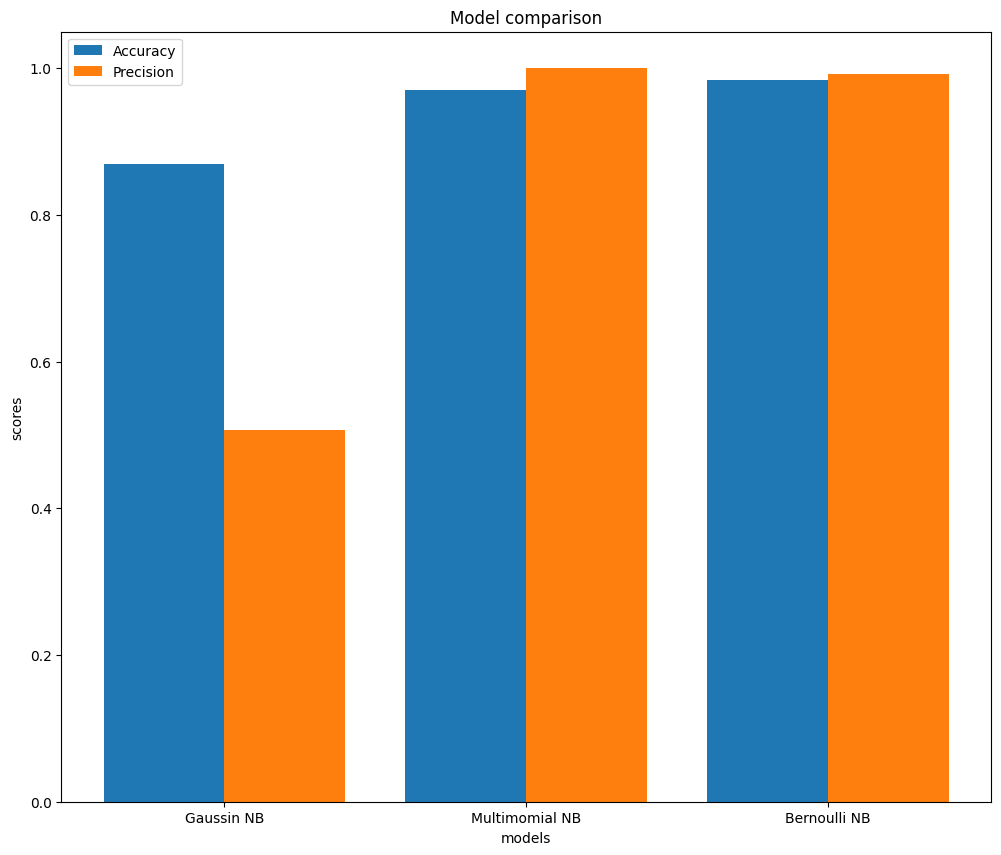

In [50]:
plt.figure(figsize = (12, 10))

accuracy_scores = [accuracy_score(y_test, pred1), accuracy_score(y_test, pred2), accuracy_score(y_test, pred3)]
precision = [precision_score(y_test,pred1), precision_score(y_test,pred2), precision_score(y_test,pred3)]

model_names = ['Gaussin NB', 'Multimomial NB', 'Bernoulli NB']

bar_width = 0.4

plt.bar([i - bar_width/2 for i in range(len(model_names))], accuracy_scores, bar_width, label='Accuracy')
plt.bar([i + bar_width/2 for i in range(len(model_names))], precision, bar_width, label = 'Precision')

plt.xlabel('models')
plt.ylabel('scores')
plt.xticks(range(len(model_names)), model_names)
plt.title('Model comparison')

plt.legend()
plt.show()

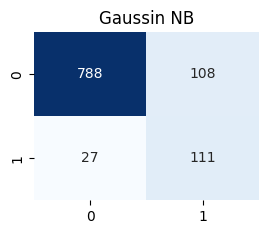

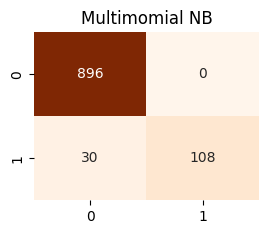

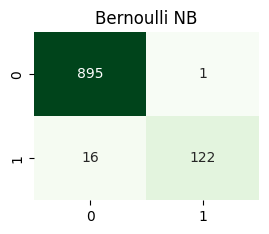

In [51]:
matrics = [confusion_matrix(y_test,pred1), confusion_matrix(y_test,pred2), confusion_matrix(y_test,pred3)]
colors = ['Blues', 'Oranges', 'Greens']
for i in range(3):
  plt.subplot(2, 2, i + 1)
  sns.heatmap(matrics[i], annot=True, fmt='g', cmap= colors[i], cbar=False)
  plt.title(model_names[i])
  plt.show()

In [52]:
df_metrics = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision
})


df_metrics

,Model,Accuracy,Precision
0,Gaussin NB,0.869439,0.506849
1,Multimomial NB,0.970986,1.000000
2,Bernoulli NB,0.983559,0.991870
